In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# df_sample = pd.read_csv(r'C:\Users\KU_0373\Downloads\santander-customer-satisfaction (1)\sample_submission.csv')

In [3]:
df_train = pd.read_csv(r'C:\Users\KU_0373\Downloads\santander-customer-satisfaction (1)\train.csv')

In [4]:
# df_test = pd.read_csv(r'C:\Users\KU_0373\Downloads\santander-customer-satisfaction (1)\test.csv')

<Axes: xlabel='TARGET', ylabel='count'>

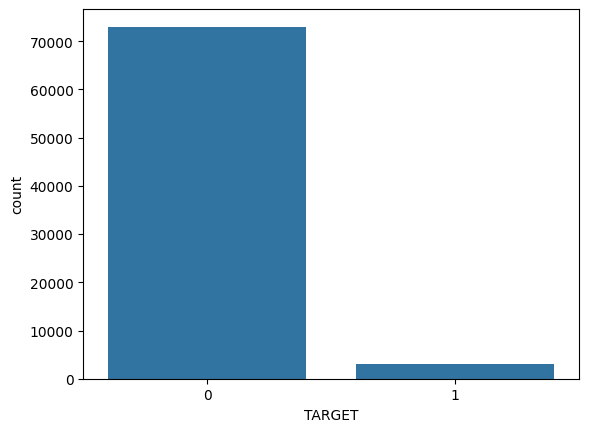

In [10]:
sns.countplot(x=df_train['TARGET'], data=df_train)
# so this imbalance data. we need to balance it by using smote.

## Our data set is df_train(train)

In [11]:
# our data is df_train
x = df_train.drop('TARGET', axis='columns')
y = df_train['TARGET']
x.shape

(76020, 370)

In [12]:
x.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,31.879418,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,7331.340000,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07


In [13]:
y.value_counts()

TARGET
0    73012
1     3008
Name: count, dtype: int64

## Remove the Outliers(z_score)

In [14]:
# import numpy as np
# import pandas as pd

# def remove_outliers_z_score(df_train, threshold=3):
#     # Calculate z-scores for each data point in each feature
#     z_scores = np.abs((df_train - df_train.mean()) / df_train.std())
    
#     # Identify outliers
#     outliers = z_scores > threshold
    
#     # Remove outliers
#     data_no_outliers = df_train[~outliers.any(axis=1)]
    
#     return data_no_outliers

# # Example usage:
# # Assuming 'data' is a DataFrame containing your dataset
# data_no_outliers = remove_outliers_z_score(df_train)
# print("Data after removing outliers:")
# # print(data_no_outliers)

In [15]:
# data_no_outliers.head()
# data_no_outliers['TARGET'].value_counts()

## Balance the data by using SMOTE

In [16]:
# Now our data is balanced.
from imblearn.over_sampling import SMOTE

In [17]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

In [18]:
y_sm.shape

(146024,)

## Remove the low variance features by using VarianceThreshold 

In [17]:
# from sklearn.feature_selection import _variance_threshold
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.25) #Removing both constant and quasi-constant
var_thr.fit(x_sm)

VarianceThreshold(threshold=0.25)

In [18]:
# it returns the true or false ie. true means it is true (it has more than 0 variacne
# so it is important) , false means it has low variance that is not important
var_thr.get_support()
len(x_sm.columns[var_thr.get_support()])
# tot is 370 it gives 198 if you give thershold=0.25 (198 col important)

198

In [19]:
# here we can columns which having less than o.25 variance
constant_columns = [col for col in x_sm.columns if col not in x_sm.columns[var_thr.get_support()]]

In [20]:
# these are deleted cols
len(constant_columns)

172

In [21]:
x_final = x_sm.drop(constant_columns, axis=1)
x_final.shape
# so finally we have independant_features are 198.(by using variance_thershold)

(146024, 198)

In [19]:
x_final.shape

(146024, 198)

In [22]:
y_sm.shape

(146024,)

## Outliers Detection(Z score)

In [21]:
# #here i just added our x and y. 
# new_df = pd.concat([x_final, y_sm], axis=1)
# new_df.describe()

In [22]:
# def outliers_detection(new_df):
#     emp_df = pd.DataFrame()
#     for col in new_df.columns[:-1]:
#         z_score = (new_df[col] - new_df[col].mean()) / new_df[col].std()
#         col_no_outlier = new_df[(z_score >-3) & (z_score < 3)]

#     df_no_outliers = pd.concat([emp_df, col_no_outlier], axis=1)
    
        
# outliers_detection(new_df)

In [23]:
# import numpy as np
# import pandas as pd

# def remove_outliers_z_score(new_df, threshold=3):
#     # Calculate z-scores for each data point in each feature
#     z_scores = np.abs((new_df - new_df.mean()) / new_df.std())
    
#     # Identify outliers
#     outliers = z_scores > threshold
    
#     # Remove outliers
#     data_no_outliers = new_df[~outliers.any(axis=1)]
    
#     return data_no_outliers

# # Example usage:
# # Assuming 'data' is a DataFrame containing your dataset
# data_no_outliers = remove_outliers_z_score(new_df)
# print("Data after removing outliers:")
# print(data_no_outliers)

In [24]:
# data_no_outliers.head()
# x_final = data_no_outliers.drop('TARGET', axis=1)
# y_final = data_no_outliers['TARGET']
# data_no_outliers.describe()

In [23]:
# so our finally data is x_final and y_sm.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

## LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100000)
lr.fit(x_train, y_train)

C:\Users\KU_0373\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=100000)

In [25]:
lr.score(x_test, y_test)

0.5734292073275125

## DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test)

0.9467899332306112

## RandomForestTree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

## SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='rbf', gamma='scale')
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

In [ ]:
plt.hist(x_final['imp_ent_var16_ult1'], bins=10)
x_final.describe()

In [ ]:
x_final.shape

In [ ]:
y_final.shape

In [ ]:
# sns.boxplot(x_final)

In [ ]:
x_final.shape

In [ ]:
# df_test = pd.read_csv(r'C:\Users\KU_0373\Downloads\santander-customer-satisfaction (1)\test.csv')

In [ ]:
# test_predict = rfc.predict(df_test)

In [ ]:
# test_predict

In [ ]:
# so this is our data
# 1.our data is not not balanced so we can balance it by using smote
# 2.then remove the features which having lowe variance by using variance_threshold
# 3.here our data set is ready so 

In [ ]:
print('hello')

In [5]:
# if you want to find the relationship blw two fearures then draw a scatter plot
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [10]:
# import matplotlib.pyplot as plt

# # Assuming X represents your independent feature and y represents your target feature
# # Replace X and y with your actual data

# # Plotting the scatter plot
# for i in df_train.columns:
#     plt.figure(figsize=(8, 6))
#     plt.scatter(df_train[i], df_train['TARGET'], color='blue', label='Data Points')
#     plt.title('Scatter Plot of Independent vs Target Feature')
#     plt.xlabel('Independent Feature')
#     plt.ylabel('Target Feature')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


In [25]:
x.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,31.879418,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,7331.340000,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07


In [28]:
# scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scl = ss.fit_transform(x)

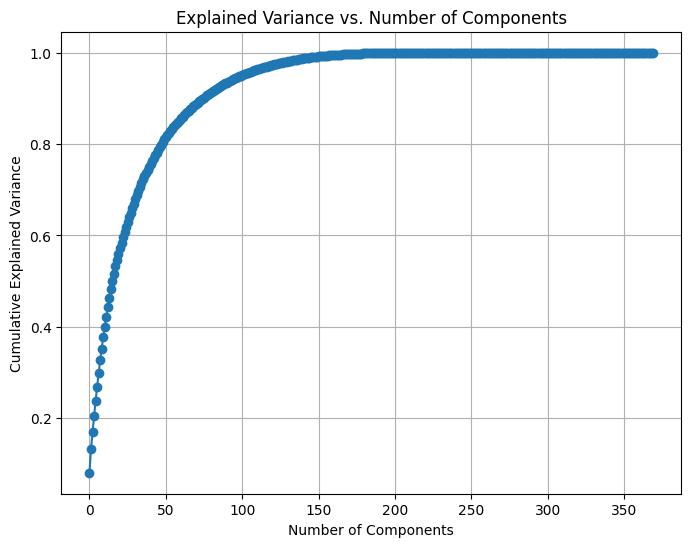

In [29]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Assuming X is your feature matrix
# Replace X with your actual data
# X = np.random.rand(100, 10)  # Example feature matrix with 100 samples and 10 features

# Perform PCA
pca = PCA()
pca.fit(x_scl)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [27]:
x.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [5]:
df_train['var3']

0        2
1        2
2        2
3        2
4        2
        ..
76015    2
76016    2
76017    2
76018    2
76019    2
Name: var3, Length: 76020, dtype: int64

In [28]:
# i will find the outliers 
# z_score
import numpy as np
outliers = []
def outliers_detection(data):
    mean = np.mean(data)
    std = np.std(data)
    threshold = 3
    for i in data:
        z_s = (i - mean) / std
        if np.abs(z_s) > 3:
            outliers.append(i)
    return outliers
o = outliers_detection(df_train['var15'])
print(o)
print(len(o))
# so here 116 are outliers for 1st col, 1245

[76, 77, 76, 80, 88, 100, 74, 86, 73, 80, 77, 75, 75, 83, 87, 84, 74, 78, 85, 75, 84, 94, 79, 73, 73, 74, 75, 89, 81, 80, 83, 80, 79, 87, 73, 75, 89, 90, 79, 76, 74, 75, 88, 89, 76, 102, 81, 79, 79, 79, 80, 84, 91, 89, 85, 74, 78, 87, 75, 75, 89, 90, 84, 91, 74, 76, 76, 78, 73, 75, 91, 92, 76, 74, 79, 82, 76, 76, 73, 75, 79, 73, 75, 76, 73, 100, 83, 73, 76, 91, 78, 82, 83, 91, 86, 91, 84, 78, 75, 87, 83, 83, 73, 86, 76, 78, 78, 74, 74, 82, 80, 80, 89, 86, 76, 76, 85, 87, 84, 83, 77, 88, 78, 86, 87, 86, 74, 84, 75, 82, 77, 73, 74, 75, 86, 83, 77, 86, 77, 94, 87, 74, 81, 91, 75, 88, 74, 89, 75, 87, 82, 83, 93, 73, 75, 76, 96, 76, 77, 80, 75, 93, 82, 87, 79, 90, 94, 79, 74, 87, 76, 81, 75, 75, 77, 78, 83, 75, 76, 75, 84, 76, 74, 75, 76, 76, 93, 86, 79, 75, 82, 87, 81, 91, 74, 76, 85, 73, 73, 74, 89, 79, 88, 83, 76, 74, 84, 75, 88, 74, 85, 78, 78, 74, 73, 80, 83, 78, 76, 78, 94, 74, 85, 79, 80, 91, 74, 73, 78, 83, 74, 76, 86, 82, 83, 78, 89, 82, 76, 77, 83, 91, 90, 77, 77, 88, 79, 79, 88, 

In [12]:
len(df_train['var3'])

76020

In [55]:
# iqr method
sorted = np.sort(df_train['var15'])
sorted.max()

105

In [56]:
q1, q3 = np.percentile(sorted, [25, 75])
print(q1)
print(q3)

23.0
40.0


In [57]:
iqr = q3 - q1
print(iqr)

17.0


In [58]:
l = q1 - (1.5 * iqr)
u = q3 + (1.5 * iqr)
print(l, u)

-2.5 65.5


In [59]:
outliers = []
for i in df_train['var15']:
    if l > i or u < i:
        outliers.append(i)
print(len(outliers))

2354


In [37]:
print(outliers)

[229, 178, 110, 177, 137, -999999, 148, 122, 121, 127, 125, 209, 72, 107, -999999, 174, 141, 191, 104, 129, 73, 94, -999999, 131, 219, 187, -999999, 114, 89, 137, 115, 209, 126, 84, 235, -999999, 161, 114, 197, -999999, 146, 174, 158, 138, -999999, 158, 120, 66, 216, 215, 90, -999999, -999999, -999999, 103, -999999, -999999, -999999, 192, -999999, 142, -999999, -999999, 163, 223, 95, -999999, 98, 156, 97, -999999, 105, 150, 183, -999999, 184, 150, 110, -999999, -999999, 220, -999999, -999999, 225, 86, 158, 124, 86, -999999, -999999, 162, -999999, -999999, 195, 218, 108, 82, -999999, -999999, 102, -999999, -999999, 174, -999999, -999999, -999999, -999999, 175, -999999, 144, 144, -999999, 156, 169, 64, -999999, 216, 201, 103, 79, 102, 91, 91, 159, -999999, 135, 189, 122, -999999, 118, 168, 78, 188, 162, 195, -999999, 69, 192, 145, 95, 154, 99, -999999, 198, -999999, 186, 185, 189, 208, 143, 164, -999999, 183, 100, 231, 149, 138, 102, -999999, 200, 190, 116, -999999, 165, -999999, 110, -9

In [60]:
outliers = []

def detect_outliers(data):
    s = np.sort(data)
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    l = q1 - (1.5 * iqr)
    u = q3 + (1.5 * iqr)
    print(l, u)
    for i in s:
        if l > i or u < i:
            outliers.append(i)
    return outliers
    
o = detect_outliers(df_train['var15'])
print(len(o))

-2.5 65.5
2354
